In [1]:
import tensorflow as tf
print(tf.__version__)

2022-01-24 15:22:29.558452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 15:22:29.558469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.0-rc0


In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

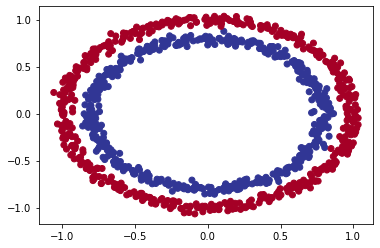

In [7]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X[100], y[100]

(array([-0.71086577,  0.27889325]), 1)

In [10]:
# set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential(name='CirclesFirst')
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# fit the model
model.fit(X, y, epochs=5)

Epoch 1/5


2022-01-24 15:22:31.342065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-24 15:22:31.342082: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-24 15:22:31.342095: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jean): /proc/driver/nvidia/version does not exist
2022-01-24 15:22:31.342272: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 0s 504us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 517us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 715us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 701us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 802us/step - loss: 0.6942 - accuracy: 0.4820


In [11]:
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 444us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
# set random state
tf.random.set_seed(42)

# Build model 1
model_1 = tf.keras.Sequential(name='circles')
model_1.add(tf.keras.layers.Dense(1))
model_1.add(tf.keras.layers.Dense(1))

# compile model 1
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# fit the model 1
model_1.fit(X, y, epochs=100, verbose=0)

# evaluate model 1
model_1.evaluate(X, y)

32/32 [==============================] - 0s 452us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [13]:
# set random state
tf.random.set_seed(42)

# build model 2
model_2 = tf.keras.Sequential(name='circles')
model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='softmax'))

# compile model 2
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
    metrics=['accuracy']

)

# fit model 2
model_2.fit(X, y, epochs=100, verbose=0)

# evaluate model 2
model_2.evaluate(X, y)

32/32 [==============================] - 0s 460us/step - loss: 0.0286 - accuracy: 0.5000


[0.028584789484739304, 0.5]

In [14]:
# set random state
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape=(None, 1), name='inputShape'),
        tf.keras.layers.Dense(10, name='hiddenLayer1'),
        tf.keras.layers.Dense(1, name='outputLayer')
    ],
    name='circles'
)
# model_3.add(tf.keras.layers.Flatten(input_shape=(1, 1, 1)))
# model_3.add(tf.keras.layers.Dense(100))
# model_3.add(tf.keras.layers.Dense(10, activation='relu'))
# model_3.add(tf.keras.layers.Dense(1, activation='softmax'))

# compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

# fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 567us/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [15]:
model_3.summary()

Model: "circles"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputShape (Dense)          (None, None, 100)         200       
                                                                 
 hiddenLayer1 (Dense)        (None, None, 10)          1010      
                                                                 
 outputLayer (Dense)         (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
        )
    # create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # make predictions using the trained model
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


doing multiclass classification


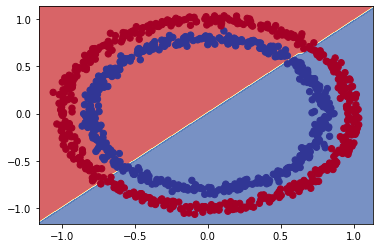

In [17]:
plot_decision_boundary(
    model_3,
    X,
    y
)

In [18]:
tf.random.set_seed(42)

# create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# split into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(
    tf.expand_dims(X_reg_train, axis=-1),
    y_reg_train,
    epochs=100,
    verbose=0
    )

model_3.evaluate(X)

32/32 [==============================] - 0s 641us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [19]:
model_3.summary()

Model: "circles"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputShape (Dense)          (None, None, 100)         200       
                                                                 
 hiddenLayer1 (Dense)        (None, None, 10)          1010      
                                                                 
 outputLayer (Dense)         (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [31]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential(name='regCircles')
model_4.add(tf.keras.layers.Dense(100, name='inputLayers'))
model_4.add(tf.keras.layers.Dense(10, name='hiddenLayer'))
model_4.add(tf.keras.layers.Dense(1, name='outputLayer'))

# compile the model in regression
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

# evaluate the model
model_4.evaluate(tf.expand_dims(X_reg_train, axis=-1), y_reg_train)[1:]
model_4.evaluate(tf.expand_dims(X_reg_test, axis=-1), y_reg_test)[1:]

2/2 [==============================] - 0s 1ms/step - loss: 57.8926 - mae: 57.8926


[57.89259338378906]